In [1]:
import torch
import sys
sys.path.append("../cosmoswag") 
from swag_galaxies import SWAGModelGal
import getdist.plots

In [2]:
xVal = torch.load("/Users/pl332/Dropbox/data/Swag/galaxies/x_val.pt")
yVal = torch.load("/Users/pl332/Dropbox/data/Swag/galaxies/y_val.pt")
xTrain = torch.load("/Users/pl332/Dropbox/data/Swag/galaxies/x_train.pt")
yTrain = torch.load("/Users/pl332/Dropbox/data/Swag/galaxies/y_train.pt")

In [3]:
low = torch.tensor([[[0.1003, 0.0300, 0.5001, 0.8001, 0.6001]]])
high = torch.tensor([[[0.4999, 0.0700, 0.8999, 1.1999, 0.9995]]])
yTrain = (yTrain - low)/(high-low)
yVal = (yVal - low)/(high-low)

In [4]:
model = SWAGModelGal()

In [5]:
model.load("galaxies_v3.pt")

In [6]:
model(xTrain[:5])

tensor([[0.1258, 0.5369, 0.4179, 0.2917, 0.2300],
        [0.3131, 0.5380, 0.4832, 0.4019, 0.7672],
        [0.1142, 0.5488, 0.3872, 0.3167, 0.2908],
        [0.3627, 0.5421, 0.4770, 0.4271, 0.7259],
        [0.2240, 0.5066, 0.4028, 0.4326, 0.3871]], grad_fn=<AddmmBackward0>)

In [7]:
yTrain[:5, 0]

tensor([[0.1882, 0.9202, 0.6843, 0.2121, 0.1602],
        [0.2843, 0.6392, 0.8999, 0.4462, 0.6555],
        [0.2162, 0.3758, 0.2971, 0.0765, 0.2969],
        [0.5676, 0.9688, 0.3282, 0.0335, 0.7356],
        [0.1076, 0.8367, 0.2816, 0.8754, 0.4251]])

In [8]:
samples = model.generate_samples(xVal[:5], nsamples=1000, scale=1, verbose=True)

Generated 100 samples.
Generated 200 samples.
Generated 300 samples.
Generated 400 samples.
Generated 500 samples.
Generated 600 samples.
Generated 700 samples.
Generated 800 samples.
Generated 900 samples.


In [9]:
ind = 3 # Which of the validation simulations to use
samples_cosmo = samples.detach().numpy()
names = ["H0", "ombh2",  "omch2", "logA", "ns"]
labels =  ["H_0", "\Omega_\mathrm{b} h^2", "\Omega_\mathrm{c} h^2", "\log A", "n_s"]
swag = getdist.MCSamples(samples=samples_cosmo[:, ind],names = names, labels = labels)
params = yVal[:5,0].detach().numpy()

Removed no burn in


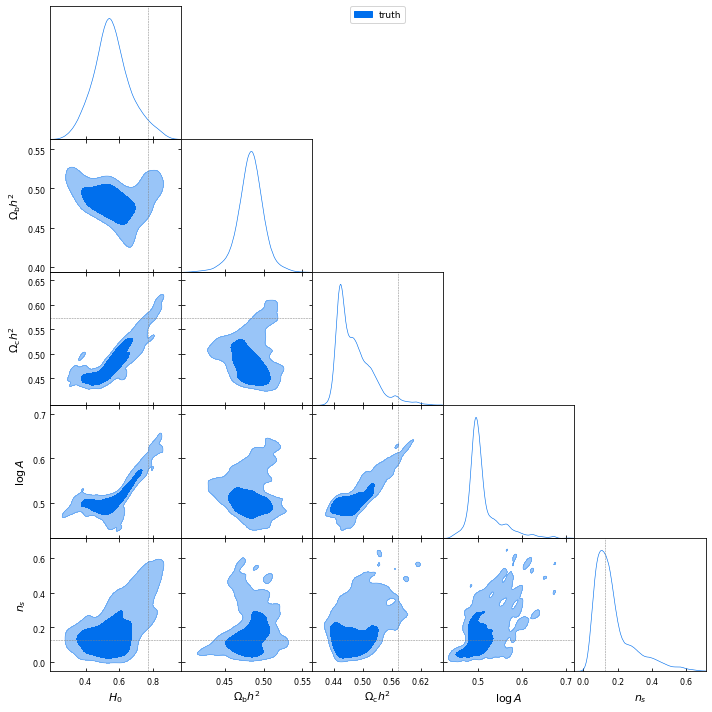

In [10]:
g = getdist.plots.getSubplotPlotter()
g.triangle_plot([swag], 
                ["H0", "ombh2",  "omch2", "logA", "ns"], 
                filled=True,
                legend_labels = ['truth', 'SWAG'],
                markers={'H0':params[ind,0],
                         'ombh2':params[ind,1],
                         'omch2':params[ind,2],
                         'logA':params[ind,3],
                         'ns':params[ind,4]}
               )

In [11]:
params[ind]

array([0.7702702 , 0.95475   , 0.57278633, 0.0610305 , 0.12468713],
      dtype=float32)